# Bail Bonds Prediction

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
# sns.set()

In [9]:
train = pd.read_csv('raw-sample.csv')
test = pd.read_csv('raw-sample-test.csv')
print('Shape of list is: ' + str(train.shape))

Shape of list is: (25, 22)


In [10]:
train.head()

,name,ethnicity,age,age-group,zip code,city,state,address,charges,violent or non-violent,...,how many times have they skipped bail,number of times arrested,occupation,name of work,zip code of work,do they own a car,do they have a family,what year were they married,do they have kids,how many kids
0,Oscar Martinez,Hispanic,52,50-60,95355,Modesto,CA,"352 Oak Dr, Modesto, CA, 95355",Burglary,Non-violent,...,0,4,Mechanic,Modesto Auto Repairs,95357,Yes,Yes,1995.0,Yes,3
1,Alberto Ruiz,Hispanic,50,50-60,95328,Keyes,CA,"802 Birch Ln, Keyes, CA, 95328",Burglary,Non-violent,...,0,3,Truck Driver,Keyes Transports,95328,Yes,Yes,1990.0,Yes,2
2,Chloe Brown,African American,33,30-40,95351,Modesto,CA,"338 Pine Rd, Modesto, CA, 95351",Robbery,Violent,...,1,2,Graphic Designer,DesignStudio,95358,No,No,NaN,No,0
3,Lena Washington,African American,40,40-50,95380,Turlock,CA,"156 Maple St, Turlock, CA, 95380",Fraud,Non-violent,...,0,2,HR Specialist,Turlock Enterprises,95382,Yes,Yes,2013.0,Yes,2
4,Rosa Mendez,Hispanic,35,30-40,95356,Riverbank,CA,"307 Oakdale Rd, Riverbank, CA, 95367",Drug Trafficking,Violent,...,0,2,Cashier,Riverbank Market,95367,Yes,Yes,2011.0,Yes,1


In [11]:
train.describe()

,age,zip code,how many times have they skipped bail,number of times arrested,zip code of work,what year were they married,how many kids
count,25.000000,25.000000,25.000000,25.000000,25.000000,14.000000,25.000000
mean,37.200000,95349.920000,0.280000,2.200000,95351.960000,2005.928571,1.040000
std,7.342797,17.946495,0.541603,1.118034,19.664859,7.549471,1.098484
min,27.000000,95307.000000,0.000000,1.000000,95307.000000,1990.000000,0.000000
25%,31.000000,95350.000000,0.000000,1.000000,95350.000000,2001.250000,0.000000
50%,37.000000,95355.000000,0.000000,2.000000,95356.000000,2008.500000,1.000000
75%,42.000000,95357.000000,0.000000,3.000000,95358.000000,2011.750000,2.000000
max,52.000000,95382.000000,2.000000,5.000000,95387.000000,2015.000000,3.000000


In [6]:
train.describe(include=['O'])

,name,ethnicity,age,age-group,zip code,city,state,address,charges,violent or non-violent,...,how many times have they skipped bail,number of times arrested,occupation,name of work,zip code of work,do they own a car,do they have a family,what year were they married,do they have kids,how many kids
count,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,15,26,26
unique,26,5,22,5,16,11,2,26,12,3,...,4,6,25,26,17,3,3,13,3,5
top,Chloe Brown,Hispanic,28,30-40,95358,Modesto,CA,"307 Oakdale Rd, Riverbank, CA, 95367",Theft,Non-violent,...,0,1,Mechanic,Riverbank Market,95354,Yes,Yes,2010,Yes,0
freq,1,10,3,11,3,15,25,1,4,18,...,19,8,2,1,3,22,14,2,14,11


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   name                                   25 non-null     object 
 1   ethnicity                              25 non-null     object 
 2   age                                    25 non-null     int64  
 3   age-group                              25 non-null     object 
 4   zip code                               25 non-null     int64  
 5   city                                   25 non-null     object 
 6   state                                  25 non-null     object 
 7   address                                25 non-null     object 
 8   charges                                25 non-null     object 
 9   violent or non-violent                 25 non-null     object 
 10  date of first arrest                   25 non-null     object 
 11  have the

In [13]:
train.isnull().sum()

name                                      0
ethnicity                                 0
age                                       0
age-group                                 0
zip code                                  0
city                                      0
state                                     0
address                                   0
charges                                   0
violent or non-violent                    0
date of first arrest                      0
have they skipped bail before             0
how many times have they skipped bail     0
number of times arrested                  0
occupation                                0
name of work                              0
zip code of work                          0
do they own a car                         0
do they have a family                     0
what year were they married              11
do they have kids                         0
how many kids                             0
dtype: int64

### Viewing Relationships

Let's start looking at our features and see if there's any correlation between the features and survival.

In [14]:
survived = train[train['have they skipped bail before'] == 1]
not_survived = train[train['have they skipped bail before'] == 0]

print ('Survived: ' + str(len(survived)) + ' %' + str(round(float(len(survived))/len(train)*100.0, 2)))
print ('Didn\'t Survived: ' + str(len(not_survived)) + ' %' + str(round(float(len(not_survived))/len(train)*100.0, 2)))
print ('Total: ' + str(len(train)))

Survived: 0 %0.0
Didn't Survived: 0 %0.0
Total: 25


#### PClass / Survival

In [124]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


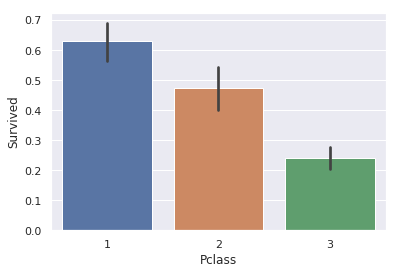

In [125]:
sns.barplot(x='Pclass', y='Survived', data=train)

We can see how 1st class people had a 67% chance of survival, which dropped a little over %20 as we go down each other class.

#### Sex / Survival

In [126]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


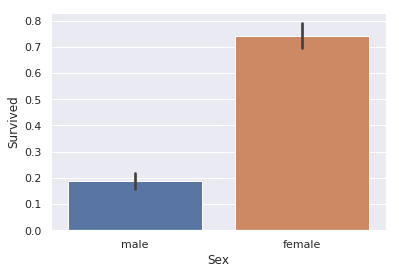

In [127]:
sns.barplot(x='Sex', y='Survived', data=train)

And here we see that females were **much** more likely to survive over males.

#### Embarked / PClass / Sex / Survived

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


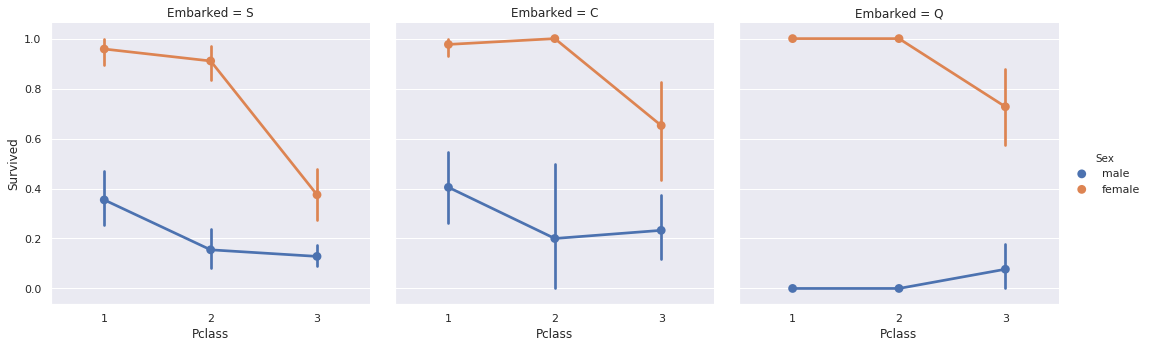

In [128]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


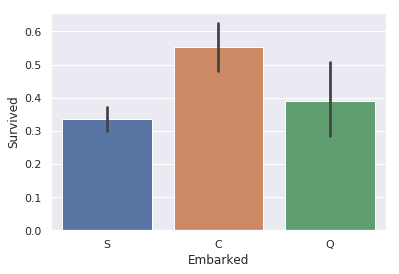

In [129]:
sns.barplot(x='Embarked', y='Survived', data=train)

If we just look at Embarked / Survival we see that C has the greatest chance of survival.

Here is another interesting way of looking at the correlation between sex, age, and survival. We see that young men and women, and middle-aged women had a better chance of surving over their male counter-parts.

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


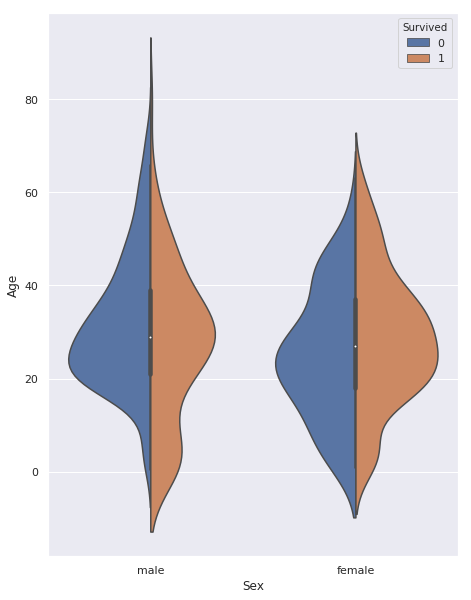

In [130]:
fig = plt.figure(figsize=(25,10))
plt1 = fig.add_subplot(133)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=plt1)

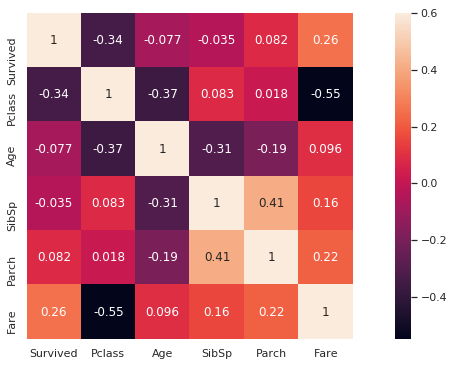

In [131]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

Heat maps can be used to find positive and negative correlations between a particular field. For instance, there is a strong negative correlation between `Fare` and `Pclass` which makes sense because we can assume first-class tickets cost more than third-class tickets. If we find features that have a strong positive or negative correlation to the survival feature, these will be ones that will be good to test against and train our classifier.

#### Filling in null values

Now we're going to try to fill in some of the null values and create new features.

First we will extract a person's title from their name and put it in it's own column called `Title`.

In [132]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [133]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Now we will try to see if there's any correlation between title and survival. We will replace all titles that had < 10 values with 'Other' for the sake of looking at the data.

In [134]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


We see an obvious correlation between title and survival showing what we saw above where women had a much higher chance of surving than men.

### Converting text fields to numeric

Since the classifier requires all numeric values, we need to convert the text fields to be numeric. Starting with the new `Title` field we just created.

In [135]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Other': 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


And we do the same for sex, filling `nan`'s in with `male` since it is the most likely item.

In [136]:
title_mapping = {'male': 0, 'female': 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(title_mapping)
    dataset['Sex'] = dataset['Sex'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


Embark was one of the few features that had some `nan` values - we can display them again by viewing all unique values in that column.

In [137]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

So we can use whatever is the most likely value and fill in the `nan`'s with that. We can find the most used values like this:

In [138]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

It appears the most likely value is `S`. So we will fill `nan`'s in with `S`.

In [139]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


Now we need to convert `Embarked` to be numeric.

In [140]:
title_mapping = {'S': 0, 'C': 1, 'Q': 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(title_mapping)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


The age feature has the most `nan` values. For this, we will first create an `AgeBand` bracket that will put each person's age inside a bracket. Then we will find the `mean` and `std` for all ages, and select a random value between them to fill in the `nan`'s.

In [141]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.536364
1   (16.0, 32.0]  0.366516
2   (32.0, 48.0]  0.347490
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


And now we convert the `Age`'s into numeric values based on their `AgeBand`.

In [142]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [143]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


`Fare` also had a number of missing values, for which we will insert the median fare value into. Then we will create a `FareBand` like we did with `Age`, and then convert `Fare` to a numeric value based on `FareBand`.

In [144]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

train['FareBand'] = pd.qcut(train['Fare'], 4)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [145]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"


In [146]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"


And we can create a new feature for the total family members by combining `SibSp` and `Parch` which combine number of siblings and number of parents.

In [147]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


Now that we have family size we can also track if someone is alone and add that as another feature. If we are alone, we only have a %30 chance of survival.

In [148]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


### Gather required features

Now we will drop any unrequired features.

In [149]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [150]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [151]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0


Now we can define the training and test data.

In [152]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

print(X_train.shape, y_train.shape, X_test.shape)

(891, 7) (891,) (418, 7)


### Training Various Classifiers

In [153]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Logistic Regression:

In [154]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

81.14 percent


#### Support Vector Machine (SVM)

In [155]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

83.84


#### Linear SVM

In [156]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

80.13


#### k-Nearest Neighbor

In [157]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

79.01


#### Decision Tree

In [158]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

87.32


#### Random Forest

In [159]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

87.32


#### Gaussian Naive Bayes

In [160]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

77.67


#### Perception

In [161]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (acc_perceptron)

78.79


#### Stochastic Gradient Descent

In [162]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

80.25


#### XGBoost

In [163]:
# X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X_train, y_train, random_state=7)
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
y_pred_xg = model_xg.predict(X_test)
acc_xg = round(model_xg.score(X_train, y_train) * 100, 2)
print(acc_xg)

84.4


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Comparing Classifiers

In [164]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent', 'XGBoost'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd, acc_xg]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,87.32
5,Random Forest,87.32
9,XGBoost,84.40
1,Support Vector Machines,83.84
0,Logistic Regression,81.14
8,Stochastic Gradient Decent,80.25
2,Linear SVC,80.13
3,KNN,79.01
7,Perceptron,78.79
6,Naive Bayes,77.67


### Submitting Test Predictions

In [165]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": y_pred_random_forest
})

submission.to_csv('submission.csv', index=False)